<img src="http://xarray.pydata.org/en/stable/_static/dataset-diagram-logo.png" align="right" width="30%">

# Faceting

Faceting is the art of presenting "small multiples" of the data. It is an
effective way of visualizing variations of 3D data where 2D slices are
visualized in a panel (subplot) and the third dimensions is varied between
panels (subplots).

Here is where xarray really augments matplotlib's functionality. We will use
monthly means to illustrate


In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

%config InlineBackend.figure_format='retina'

In [2]:
ds = xr.tutorial.open_dataset("air_temperature_gradient")
monthly_means = ds.groupby("time.month").mean()
# xarray's groupby reductions drop attributes. Let's assign them back so we get nice labels.
monthly_means.Tair.attrs = ds.Tair.attrs

Note that the dimensions are now `lat, lon, month`.

## Basic faceting

We want to visualize how the monthly mean air temperature varies with month of
the year.

The simplest way to facet is to specify the `row` or `col` kwargs which are
expected to be a dimension name. Here we use `month` so that each panel or
"facet" of the plot presents the mean temperature field in a given month. Since
a 12 column plot would be too small to interpret, we can "wrap" the facets into
multiple rows using `col_wrap`


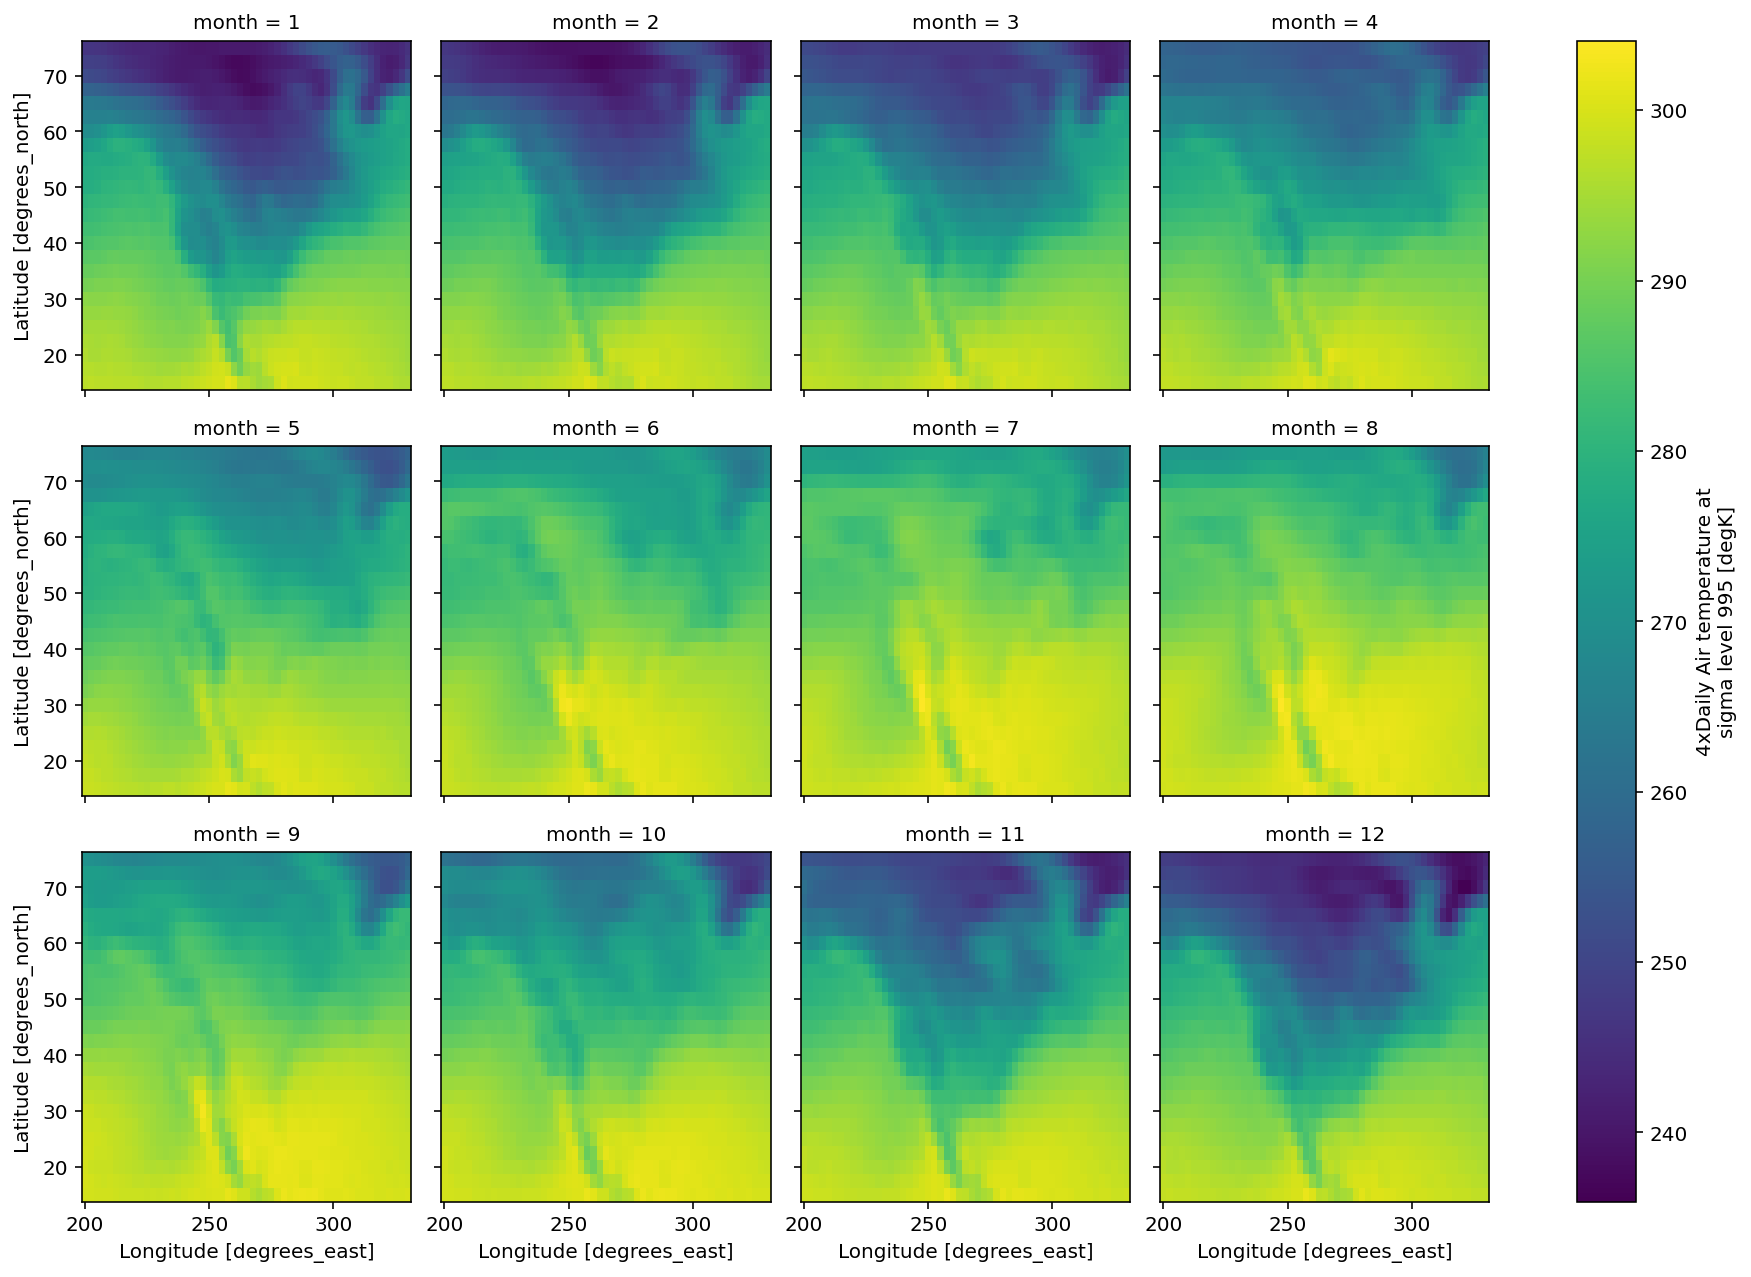

In [3]:
fg = monthly_means.Tair.plot(
    col="month",
    col_wrap=4,  # each row has a maximum of 4 columns
)

## Customizing

All the usual customizations are possible


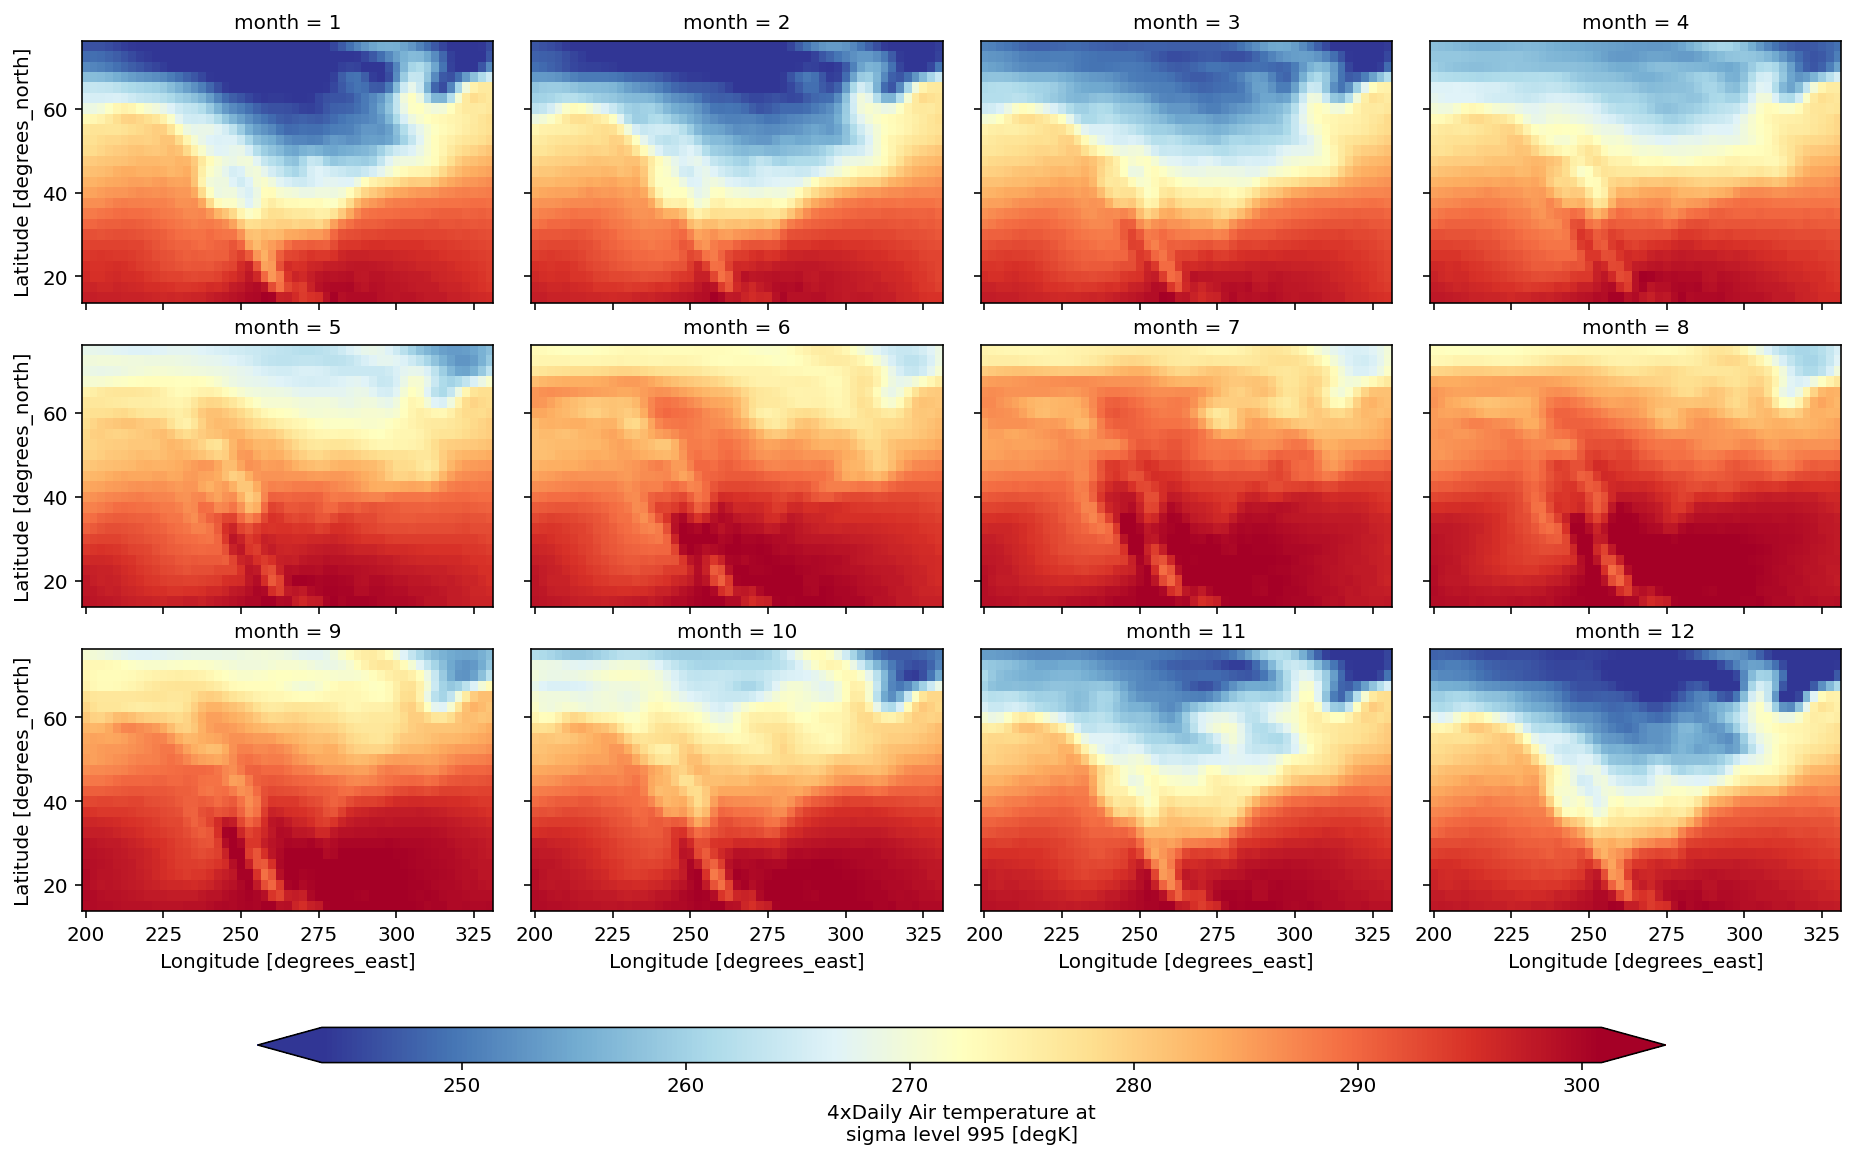

In [4]:
fg = monthly_means.Tair.plot(
    col="month",
    col_wrap=4,
    # The remaining kwargs customize the plot just as for not-faceted plots
    robust=True,
    cmap=mpl.cm.RdYlBu_r,
    cbar_kwargs={
        "orientation": "horizontal",
        "shrink": 0.8,
        "aspect": 40,
        "pad": 0.1,
    },
)

The returned FacetGrid object `fg` has many useful properties and methods e.g.

1. `fg.fig` provides a handle to the figure
2. `fg.axes` is a numpy object array with handles to each individual axes
3. `fg.set_xlabels` and `fg.set_ylabels` can be used to change axes labels.

See the [documentation](https://xarray.pydata.org/en/stable/api.html#faceting) for a full list.

### Exercise

Use these methods to set a title for the figure using `suptitle`, as well as
change the x- and y-labels.

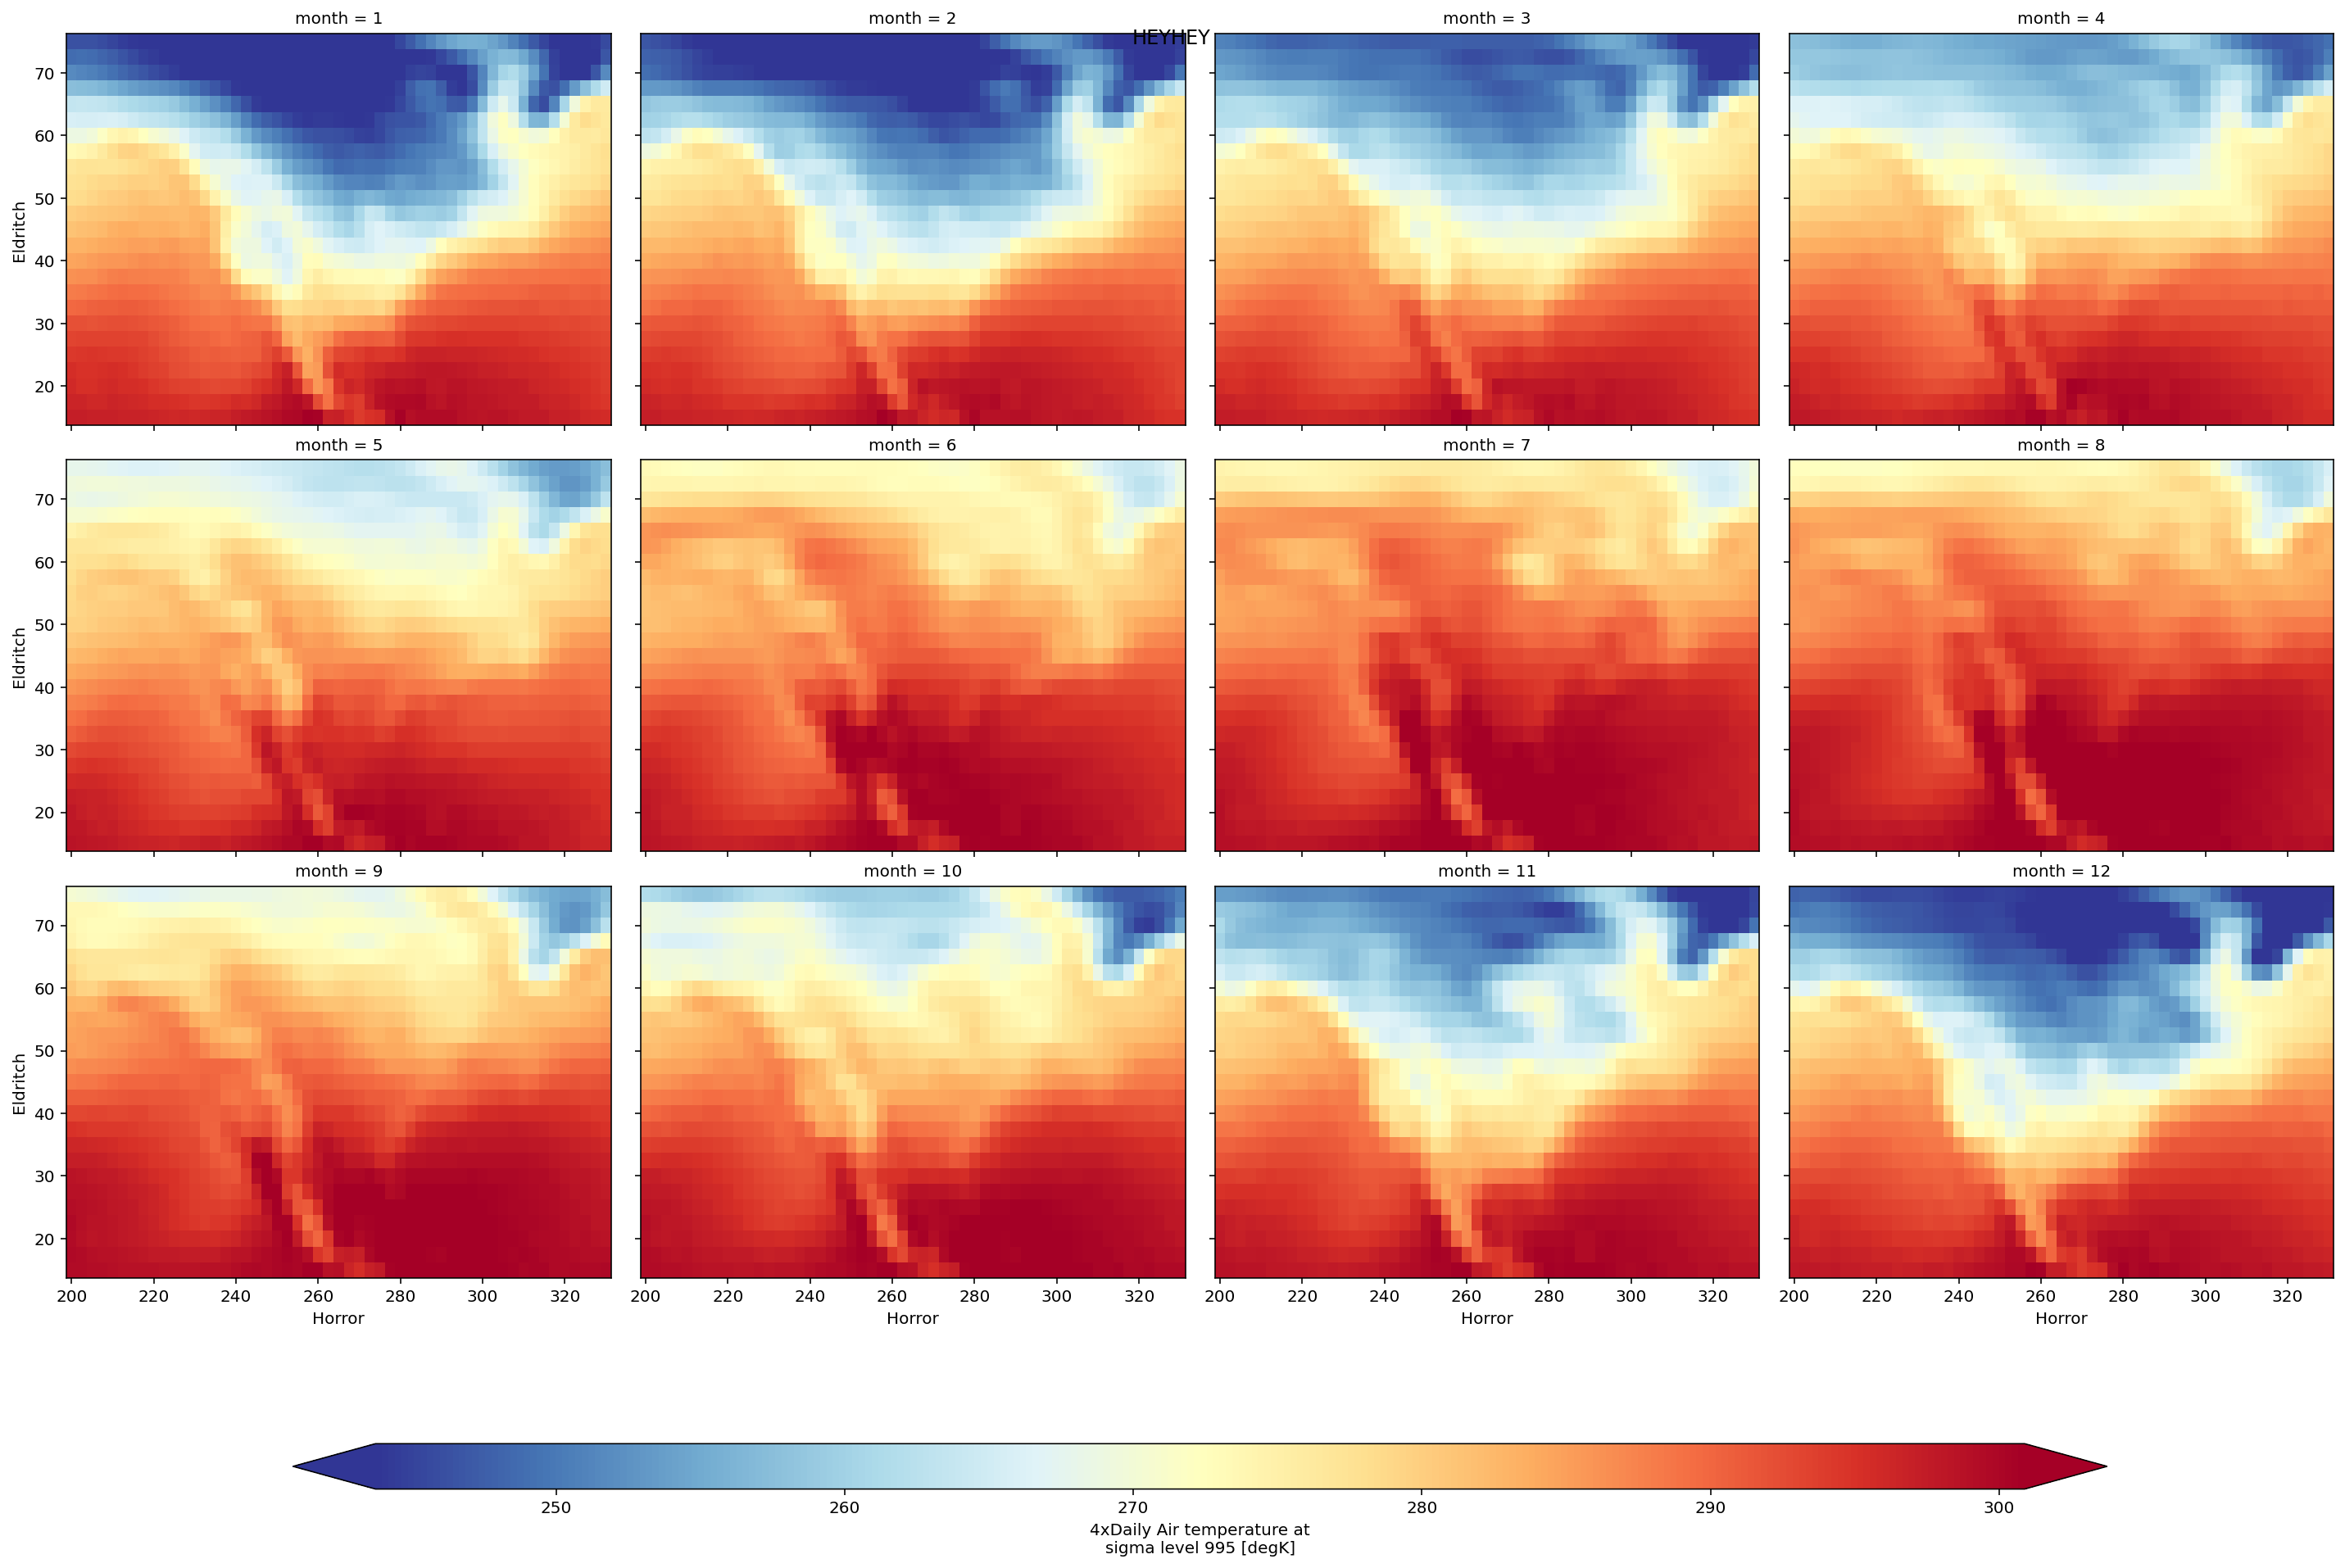

In [16]:
fg = monthly_means.Tair.plot(
    col="month",
    col_wrap=4,
    # The remaining kwargs customize the plot just as for not-faceted plots
    robust=True,
    cmap=mpl.cm.RdYlBu_r,
    cbar_kwargs={
        "orientation": "horizontal",
        "shrink": 0.8,
        "aspect": 40,
        "pad": 0.1,
    },
    figsize=(20, 15)
)
fg.fig.suptitle("HEYHEY")
fg.set_xlabels("Horror")
fg.set_ylabels("Eldritch")

## Modifying all facets

The FacetGrid object has some more advanced methods that let you customize the
plot further.

Here we illustrate the use of `map` and `map_dataarray` that let you map custom
plotting functions to an existing `FacetGrid`. The functions passed to `map` and
`map_dataarray` must have a particular signature. See the docstring for more
details.

Alternatively one can loop over `fg.axes` and modify each individual subplot as
needed


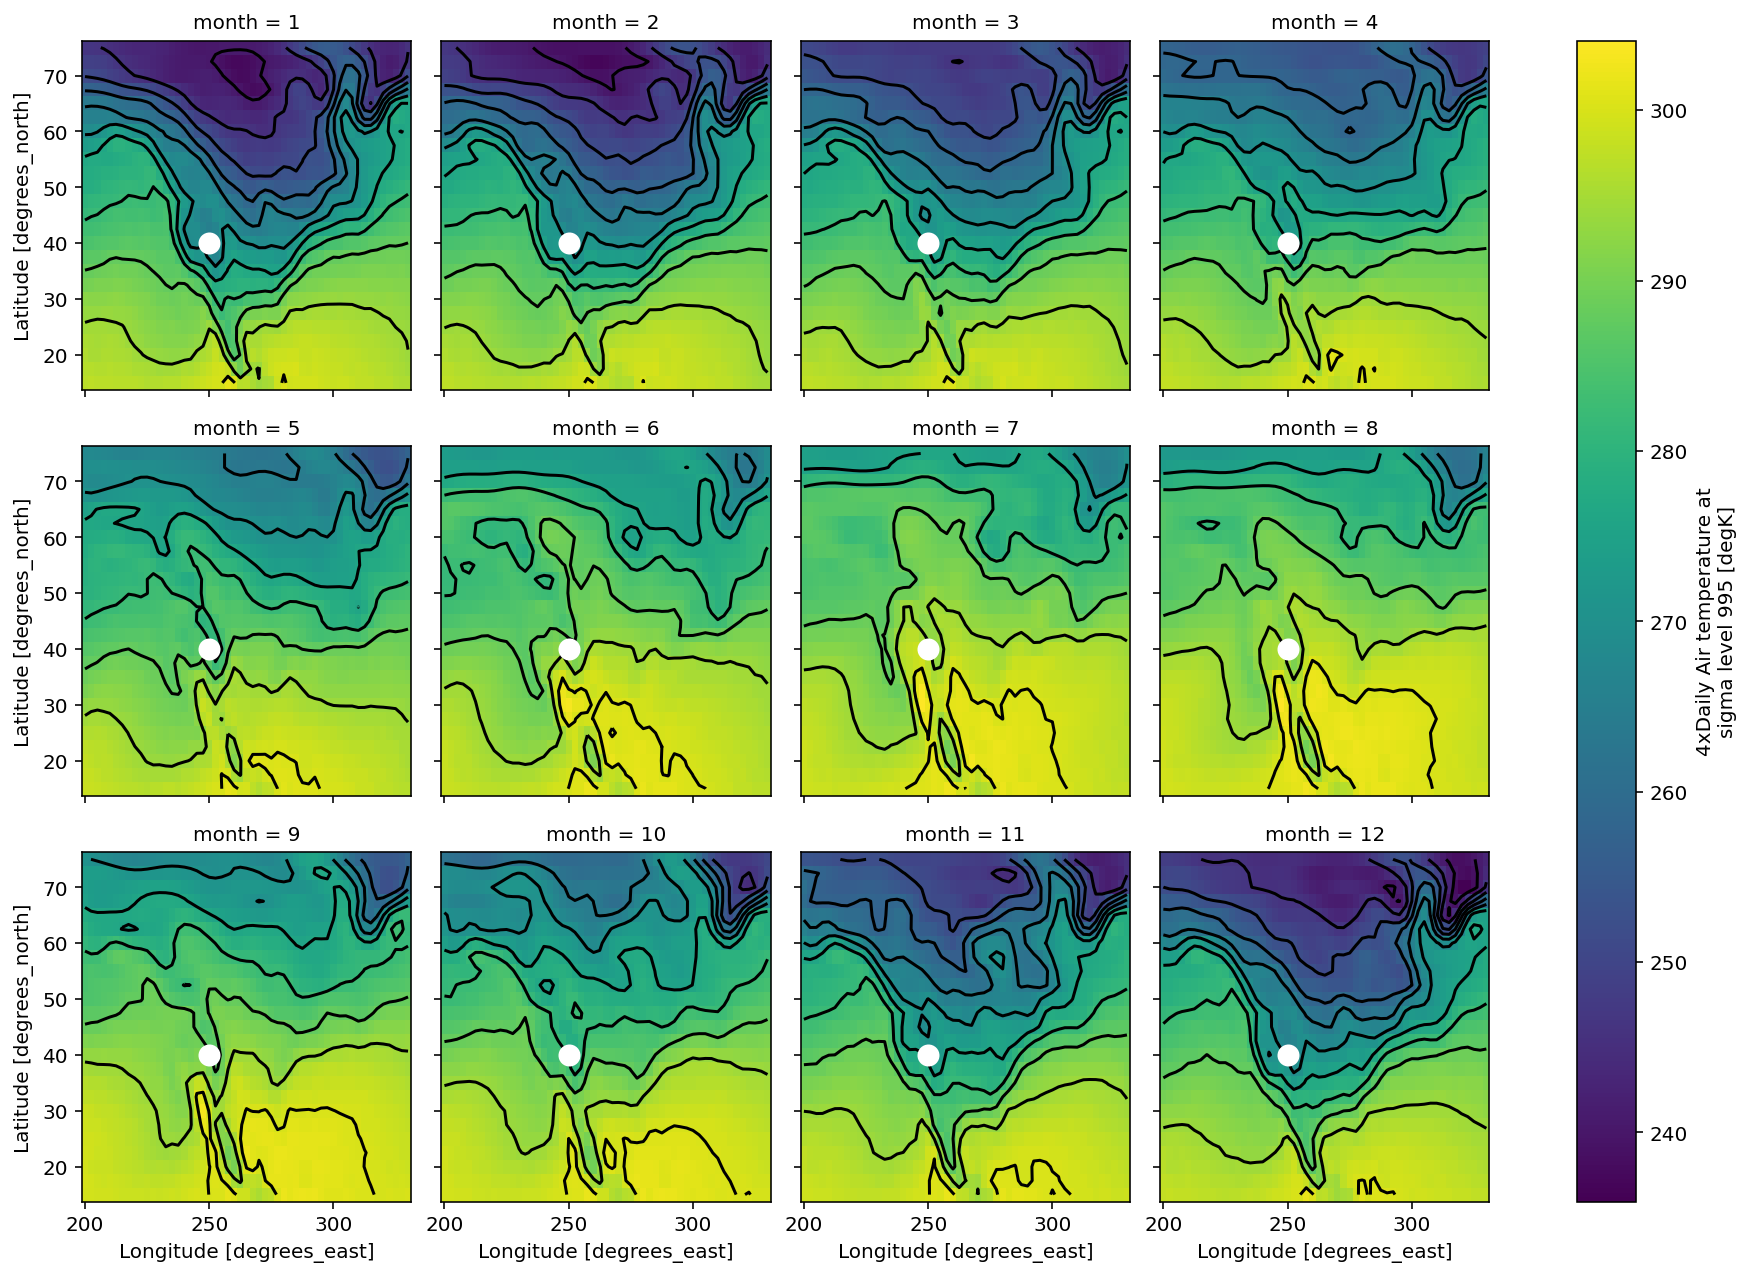

In [17]:
fg = monthly_means.Tair.plot(col="month", col_wrap=4)

# Use this to plot contours on each panel
# Note that this plotting call uses the original DataArray gradients
fg.map_dataarray(xr.plot.contour, x="lon", y="lat", colors="k", levels=13, add_colorbar=False)

# Add a point (or anything else!)
fg.map(lambda: plt.plot(250, 40, markersize=20, marker=".", color="w"))

## Faceting multiple DataArrays

Faceting can be used to plot multiple DataArrays in a Dataset. The trick is to
use `to_array()` to convert a Dataset to a DataArray and then facet that.

This trick only works when it is sensible to use the same colormap and color
scale for all DataArrays like with `dTdx` and `dTdy`


In [18]:
gradients = monthly_means[["dTdx", "dTdy"]].to_array("gradient")
gradients

<xarray.DataArray (gradient: 2, month: 12, lat: 25, lon: 53)>
array([[[[ 5.08173684e-07, -9.46942578e-07, -4.03479180e-06, ...,
           1.00858488e-05,  1.81633768e-05,  2.19007525e-05],
         [ 6.02189118e-07, -8.90132014e-07, -4.25928238e-06, ...,
           1.44879168e-05,  3.15986872e-05,  3.92536967e-05],
         [-4.04702814e-06, -4.58570503e-06, -6.01438433e-06, ...,
           2.61500463e-05,  4.34150716e-05,  5.08334851e-05],
         ...,
         [-2.34571348e-06, -1.20601771e-06,  8.53055610e-07, ...,
          -1.45294723e-06, -2.20137940e-06, -2.35507150e-06],
         [-2.84735904e-07, -7.32893909e-07, -6.86845681e-07, ...,
          -1.83361863e-06, -1.57463614e-06, -2.10182111e-06],
         [ 3.16048641e-07, -1.98249467e-07, -4.91980586e-07, ...,
          -1.71716079e-06, -7.17862974e-07, -5.23411643e-07]],

        [[-3.81416953e-06, -5.11973212e-06, -8.09966514e-06, ...,
           1.27637104e-05,  1.81622308e-05,  2.02568535e-05],
         [-4.84793247e-07, -1.95023244e-06, -5.09623078e-06, ...,
           1.05404051e-05,  2.67223077e-05,  3.38635218e-05],
         [-5.29987710e-06, -5.99807481e-06, -7.59168552e-06, ...,
           2.05774650e-05,  3.87745931e-05,  4.66650490e-05],
...
          -1.65317442e-06, -2.42777446e-06, -1.94103222e-06],
         [-1.84547469e-06, -3.26857275e-06, -3.11111307e-06, ...,
          -1.44888838e-06, -2.25341228e-06, -3.15753573e-06],
         [-8.51903962e-07, -1.66222276e-06, -2.48365177e-06, ...,
          -2.15396517e-06, -2.12524083e-06, -3.46904199e-06]],

        [[-6.71428415e-06, -8.14977375e-06, -9.80123150e-06, ...,
           3.74177898e-06,  2.25041845e-07, -5.66836025e-06],
         [-7.73049214e-06, -6.68594612e-06, -6.57780447e-06, ...,
           3.23118388e-06, -1.69362568e-06, -8.46021612e-06],
         [-1.21043013e-05, -1.01668966e-05, -9.37458026e-06, ...,
          -2.60197321e-05, -3.02746539e-05, -3.18970924e-05],
         ...,
         [-1.97388658e-06, -2.87304010e-06, -2.76804826e-06, ...,
          -2.31021318e-06, -2.91697165e-06, -2.45591286e-06],
         [-2.12526766e-06, -3.82872440e-06, -3.59293290e-06, ...,
          -2.17964885e-06, -2.80768063e-06, -3.58095190e-06],
         [-1.57234820e-06, -2.31013792e-06, -2.78555922e-06, ...,
          -2.83686700e-06, -2.73794444e-06, -3.87158479e-06]]]],
      dtype=float32)
Coordinates:
  * lat       (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon       (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * month     (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
  * gradient  (gradient) <U4 'dTdx' 'dTdy'

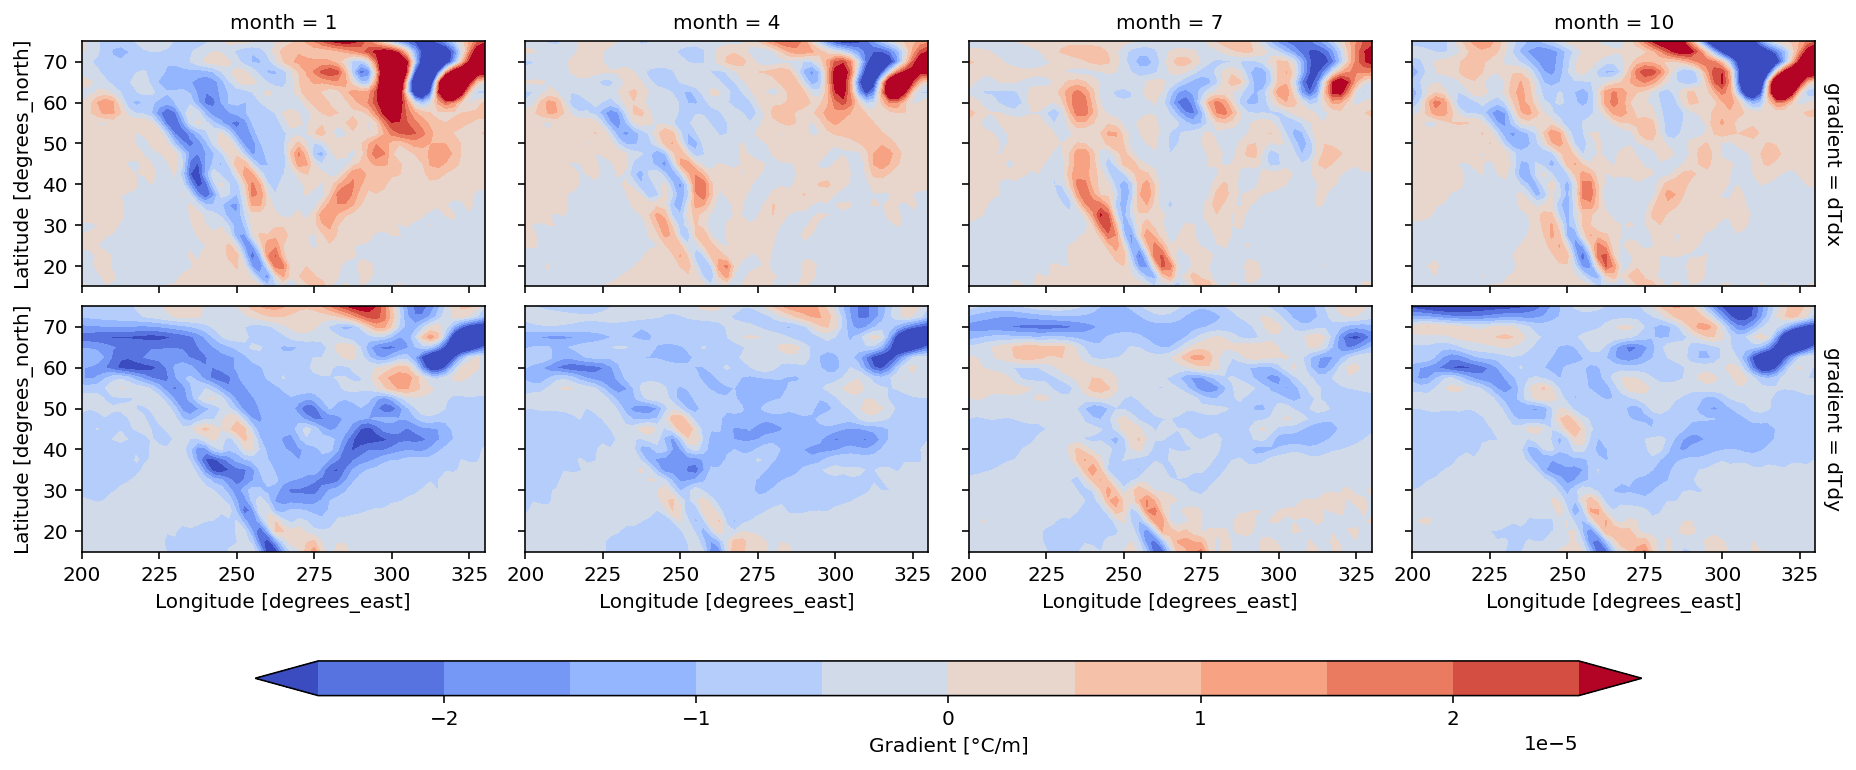

In [19]:
fg = gradients.isel(month=slice(None, None, 3)).plot.contourf(
    levels=13,
    col="month",
    row="gradient",
    robust=True,
    cmap=mpl.cm.coolwarm,
    cbar_kwargs={
        "orientation": "horizontal",
        "shrink": 0.8,
        "aspect": 40,
        "label": "Gradient [°C/m]",
    },
)